<a href="https://colab.research.google.com/github/Ignaciofeser/Modelo-Aprendizaje-Automatico/blob/main/Exposici%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se importa drive para usar el archivo subido en MyDrive.

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Se importan las librerias que se utilizaran en el programa.

In [49]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

Se obtiene el dataset en una variable utilizando pandas.

In [50]:
df = pd.read_csv("/content/drive/MyDrive/breast_cancer.csv")

Exploracion del dataset.

In [51]:
df.shape

(683, 10)

In [52]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [53]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


Aseguramos que no existan ningun valor nulo

In [55]:
df.isna().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Modificamos las variables de class de 2 y 4 a 0 y 1.

In [56]:
df['Class'].replace(2,0,inplace=True) #Cambiamos la clase por binario
df['Class'].replace(4,1,inplace=True)

In [57]:
df['Class'].unique()

array([0, 1])

Verificamos que se hayan modificado correctamente.

In [58]:
df.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


Analizamos los datos mediante graficos.

<Axes: xlabel='Class', ylabel='Clump Thickness'>

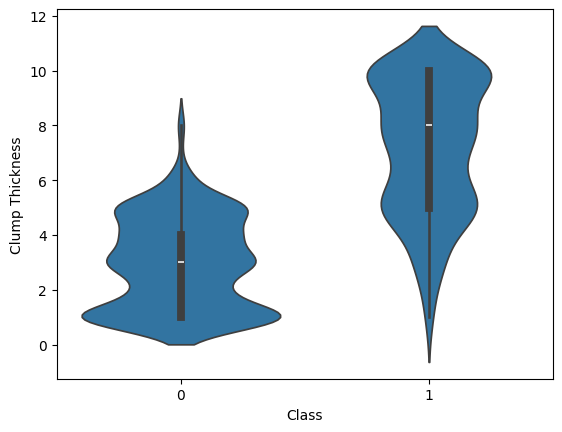

In [59]:
sb.violinplot(x='Class', y='Clump Thickness', data=df)

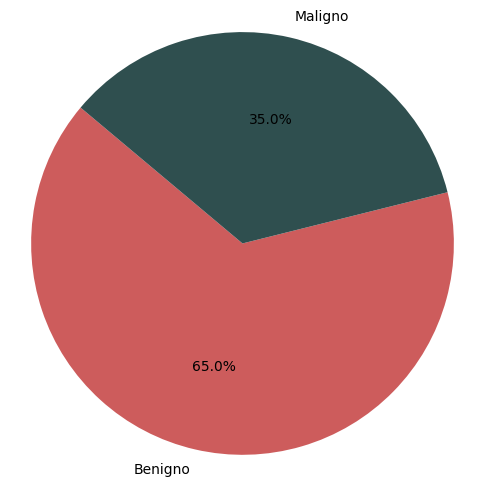

In [60]:
class_counts = df['Class'].value_counts()
class_counts = df['Class'].value_counts()
colors = ['#CD5C5C', '#2F4F4F']
class_labels = df['Class'].replace({0: 'Benigno', 1: 'Maligno'}).value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_labels, labels=class_labels.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.show()

<Axes: >

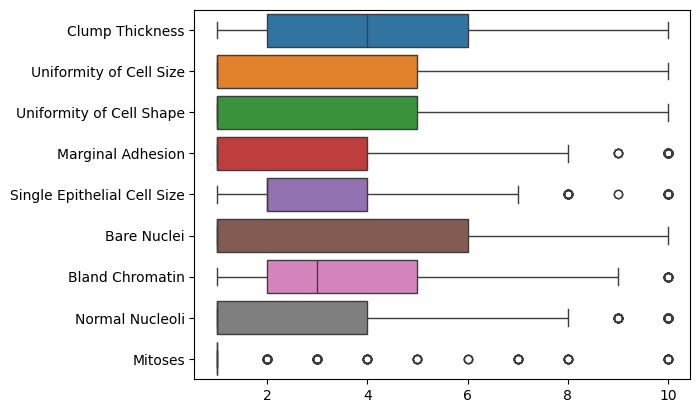

In [61]:
sb.boxplot(data=df.drop('Class', axis=1), orient='h')

<Axes: >

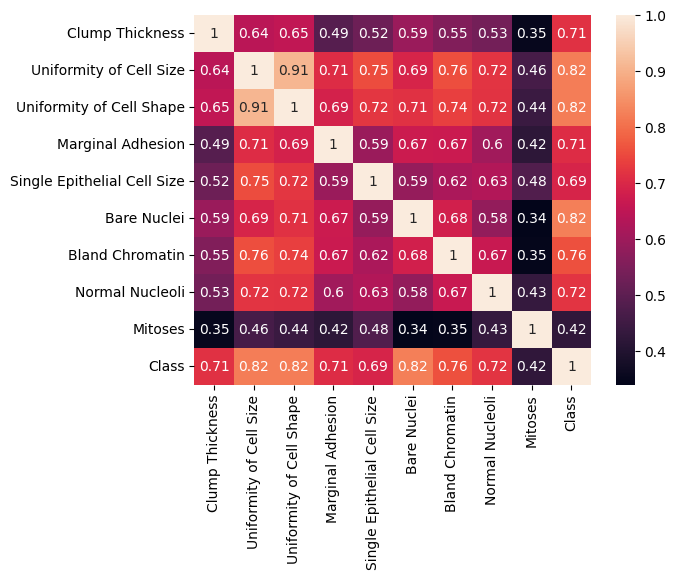

In [62]:
sb.heatmap(df.corr(),annot=True)

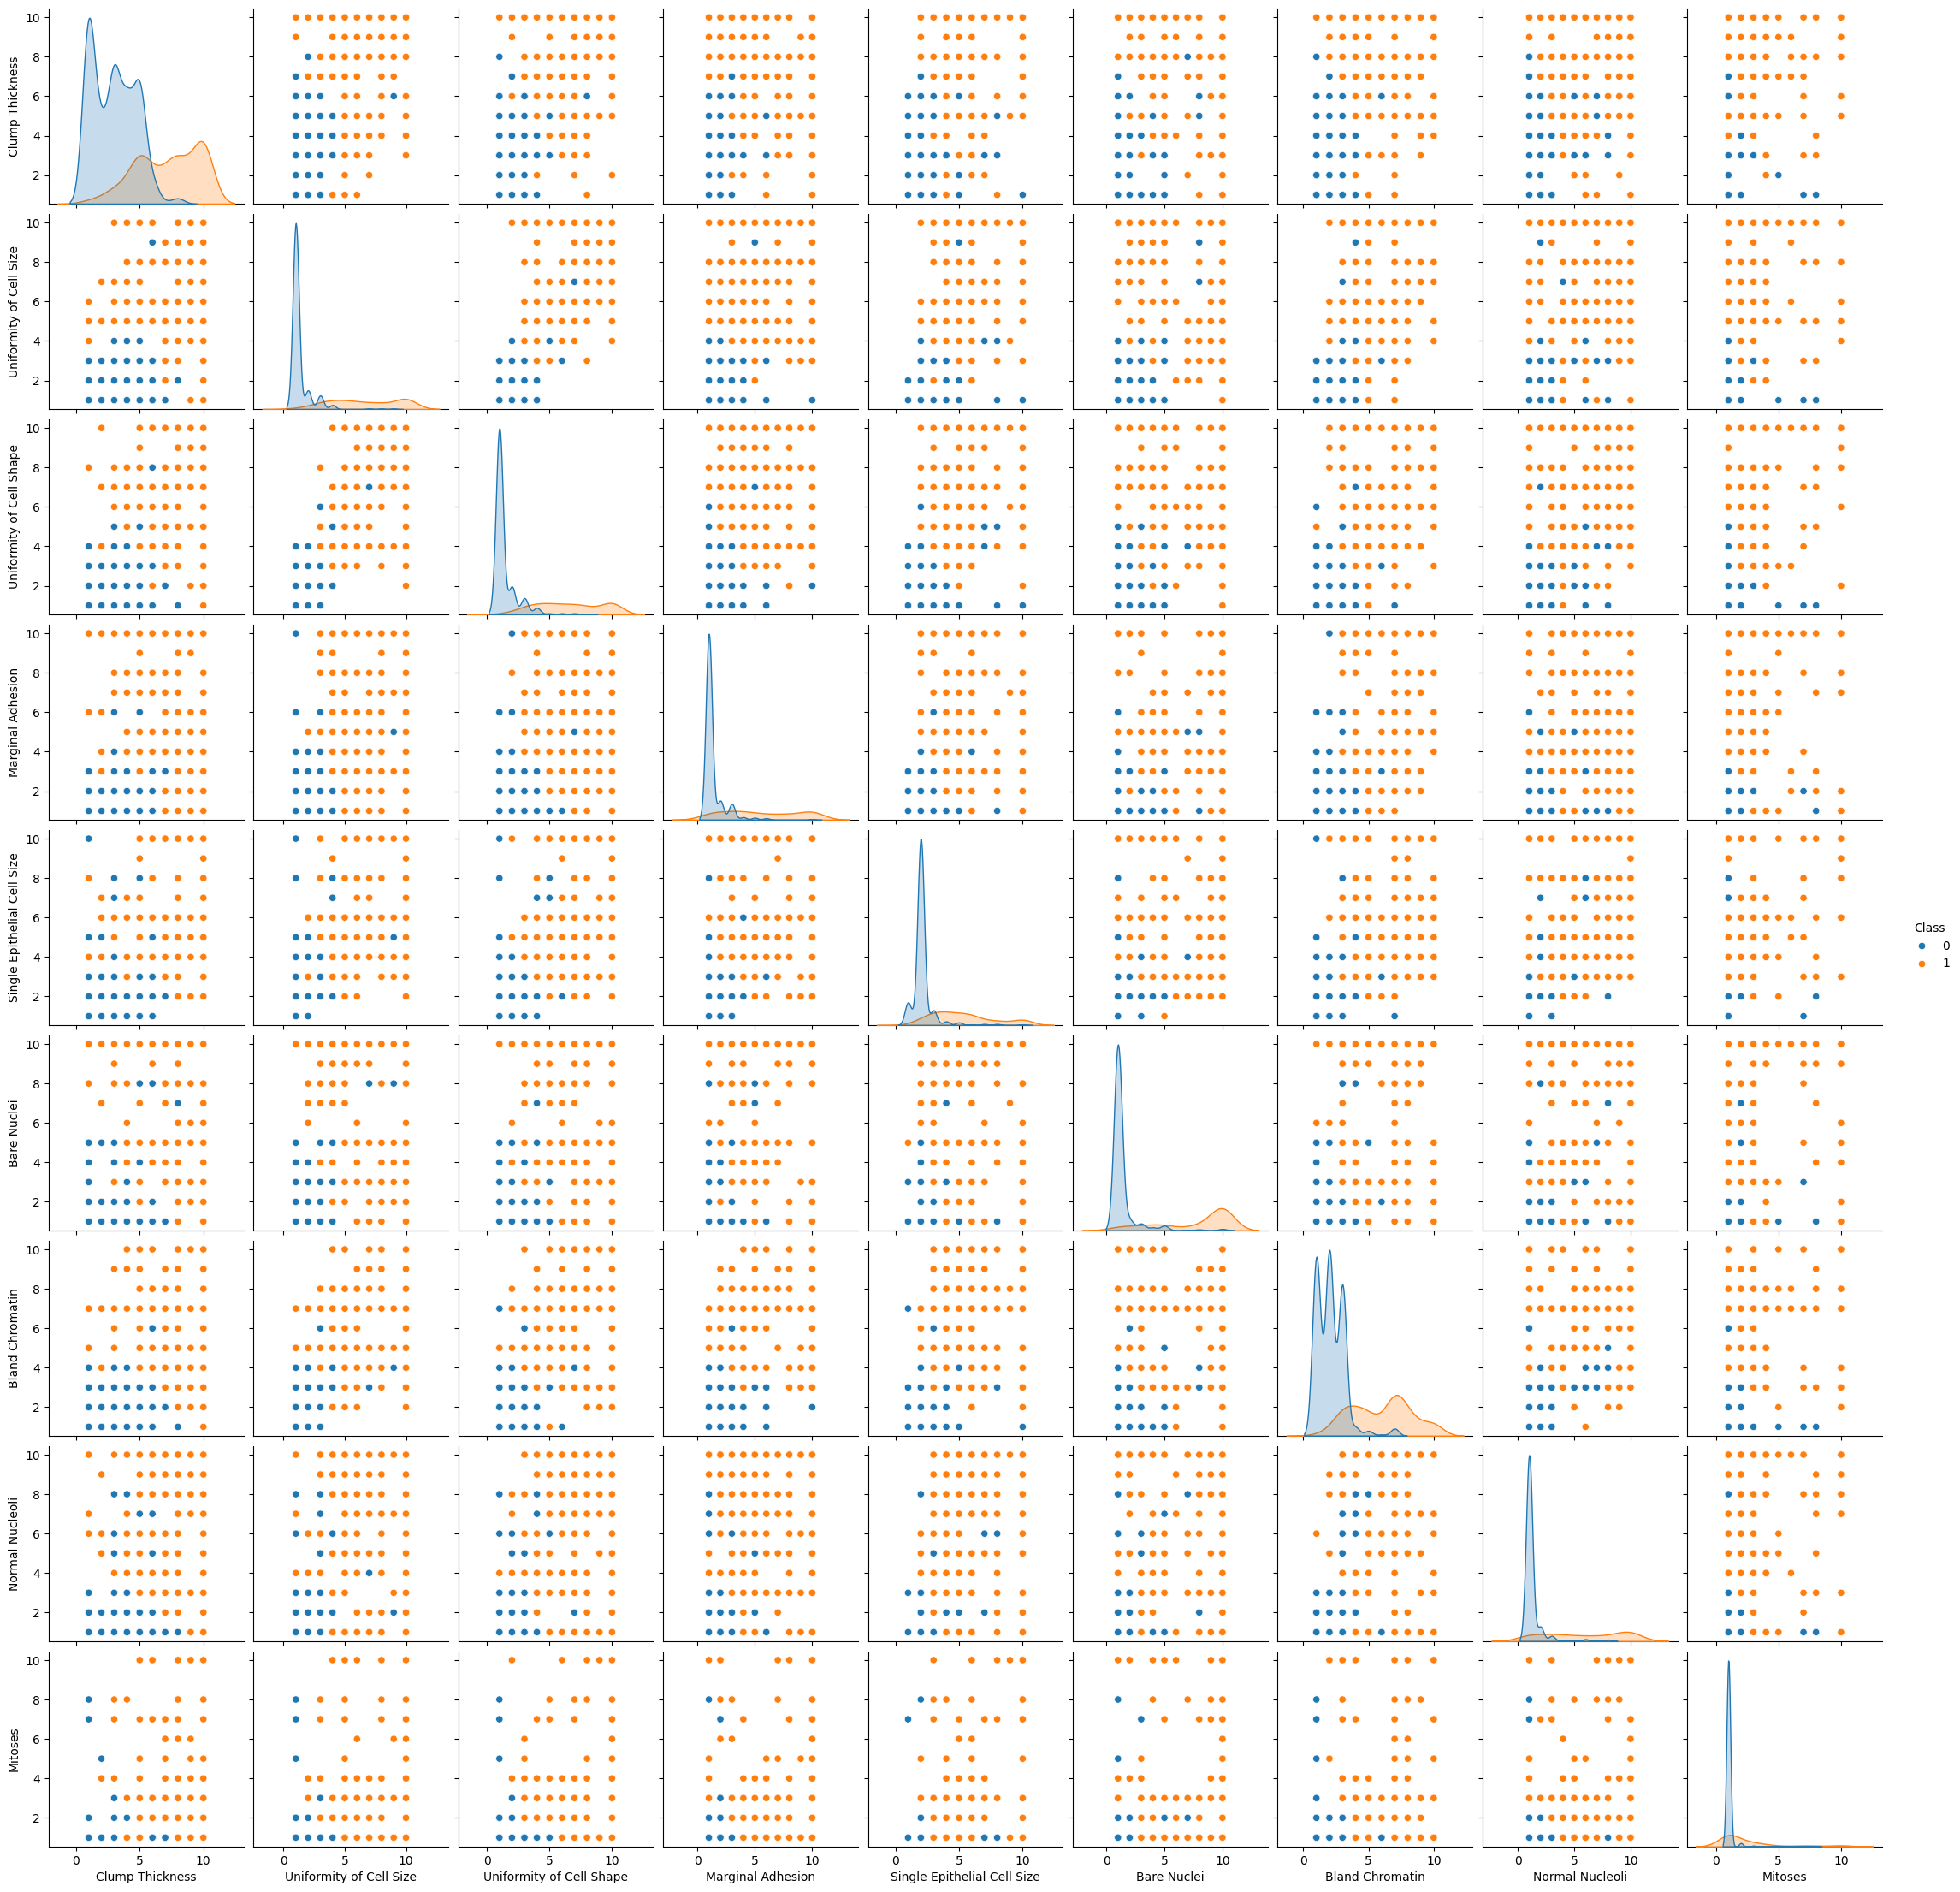

In [63]:
sb.pairplot(df, hue='Class')

In [64]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df.head())

   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0         0.197905                -0.702212                 -0.741774   
1         0.197905                 0.277252                  0.262783   
2        -0.511643                -0.702212                 -0.741774   
3         0.552679                 1.583204                  1.602192   
4        -0.156869                -0.702212                 -0.741774   

   Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0          -0.639366                    -0.555608    -0.698853   
1           0.758032                     1.695166     1.772867   
2          -0.639366                    -0.555608    -0.424217   
3          -0.639366                    -0.105454     0.125054   
4           0.059333                    -0.555608    -0.698853   

   Bland Chromatin  Normal Nucleoli  Mitoses  
0        -0.181827        -0.612927  -0.3484  
1        -0.181827        -0.285105  -0.3484  
2        -0.181827     

In [65]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [66]:
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [67]:
y.tail()

678    0
679    0
680    1
681    1
682    1
Name: Class, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((546, 9), (137, 9), (546,), (137,))

In [69]:
from sklearn.linear_model import LogisticRegression

modelovic = LogisticRegression(random_state=0)
modelovic.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [70]:
predicciones = modelovic.predict(X_test)
predicciones2 = modelovic.predict(X_train)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicciones)
accuracy_score(y_train, predicciones2)

print(f"Accuracy de train: {accuracy_score(y_train, predicciones2)}")
print(f"Accuracy de test: {accuracy_score(y_test, predicciones)}")


Accuracy de train: 0.9706959706959707
Accuracy de test: 0.9562043795620438


In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        87
           1       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



In [73]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predicciones)

array([[84,  3],
       [ 3, 47]])

In [74]:
cm = pd.DataFrame(confusion_matrix(y_test, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])
pd.DataFrame(confusion_matrix(y_test, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,84,3
Real: Si,3,47


In [75]:
nuevo_paciente = [5, 1, 1, 1, 4, 1, 3, 8, 1]
prediccion = modelovic.predict([nuevo_paciente])

if prediccion[0] == 0:
  print("Benigno")
else:
  print("Maligno")

Benigno


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [76]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.25)

In [77]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
predicciones2 = modelo.predict(X_ent)

In [78]:
from sklearn.metrics import accuracy_score

accuracy_score(y_ent, predicciones2)
accuracy_score(y_pru, predicciones)
print(f"Accuracy de train: {accuracy_score(y_ent, predicciones2)}")
print(f"Accuracy de test: {accuracy_score(y_pru, predicciones)}")

Accuracy de train: 1.0
Accuracy de test: 0.9415204678362573


In [79]:
from sklearn.tree import DecisionTreeClassifier

resultados = []
for i in range(1,20):
  modelo = DecisionTreeClassifier(max_depth=i)
  modelo.fit(X_ent, y_ent)
  predicciones = modelo.predict(X_pru)
  exactitud = accuracy_score(y_pru, predicciones)
  print(f"Resultado para {i}: {exactitud}")
  resultados.append(exactitud)

Resultado para 1: 0.9064327485380117
Resultado para 2: 0.9473684210526315
Resultado para 3: 0.9415204678362573
Resultado para 4: 0.9473684210526315
Resultado para 5: 0.9473684210526315
Resultado para 6: 0.9473684210526315
Resultado para 7: 0.9473684210526315
Resultado para 8: 0.9415204678362573
Resultado para 9: 0.9298245614035088
Resultado para 10: 0.9473684210526315
Resultado para 11: 0.9415204678362573
Resultado para 12: 0.935672514619883
Resultado para 13: 0.9298245614035088
Resultado para 14: 0.9473684210526315
Resultado para 15: 0.935672514619883
Resultado para 16: 0.9473684210526315
Resultado para 17: 0.935672514619883
Resultado para 18: 0.9473684210526315
Resultado para 19: 0.9532163742690059


In [80]:
modelo = DecisionTreeClassifier(max_depth=8)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
exactitud = accuracy_score(y_pru, predicciones)

In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       113
           1       0.90      0.93      0.92        58

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [82]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,107,6
Real: Si,4,54


[Text(0.38446969696969696, 0.9444444444444444, 'Uniformity of Cell Size <= 2.5\n0.457\n512\n[331, 181]\nBenigno'),
 Text(0.21212121212121213, 0.8333333333333334, 'Bare Nuclei <= 5.5\n0.056\n315\n[306, 9]\nBenigno'),
 Text(0.15151515151515152, 0.7222222222222222, 'Normal Nucleoli <= 9.0\n0.019\n308\n[305, 3]\nBenigno'),
 Text(0.12121212121212122, 0.6111111111111112, 'Clump Thickness <= 6.5\n0.013\n307\n[305, 2]\nBenigno'),
 Text(0.06060606060606061, 0.5, 'Bare Nuclei <= 4.5\n0.007\n305\n[304, 1]\nBenigno'),
 Text(0.030303030303030304, 0.3888888888888889, '0.0\n297\n[297, 0]\nBenigno'),
 Text(0.09090909090909091, 0.3888888888888889, 'Single Epithelial Cell Size <= 1.5\n0.219\n8\n[7, 1]\nBenigno'),
 Text(0.06060606060606061, 0.2777777777777778, '0.0\n1\n[0, 1]\nMaligno'),
 Text(0.12121212121212122, 0.2777777777777778, '0.0\n7\n[7, 0]\nBenigno'),
 Text(0.18181818181818182, 0.5, 'Clump Thickness <= 7.5\n0.5\n2\n[1, 1]\nBenigno'),
 Text(0.15151515151515152, 0.3888888888888889, '0.0\n1\n[0, 1

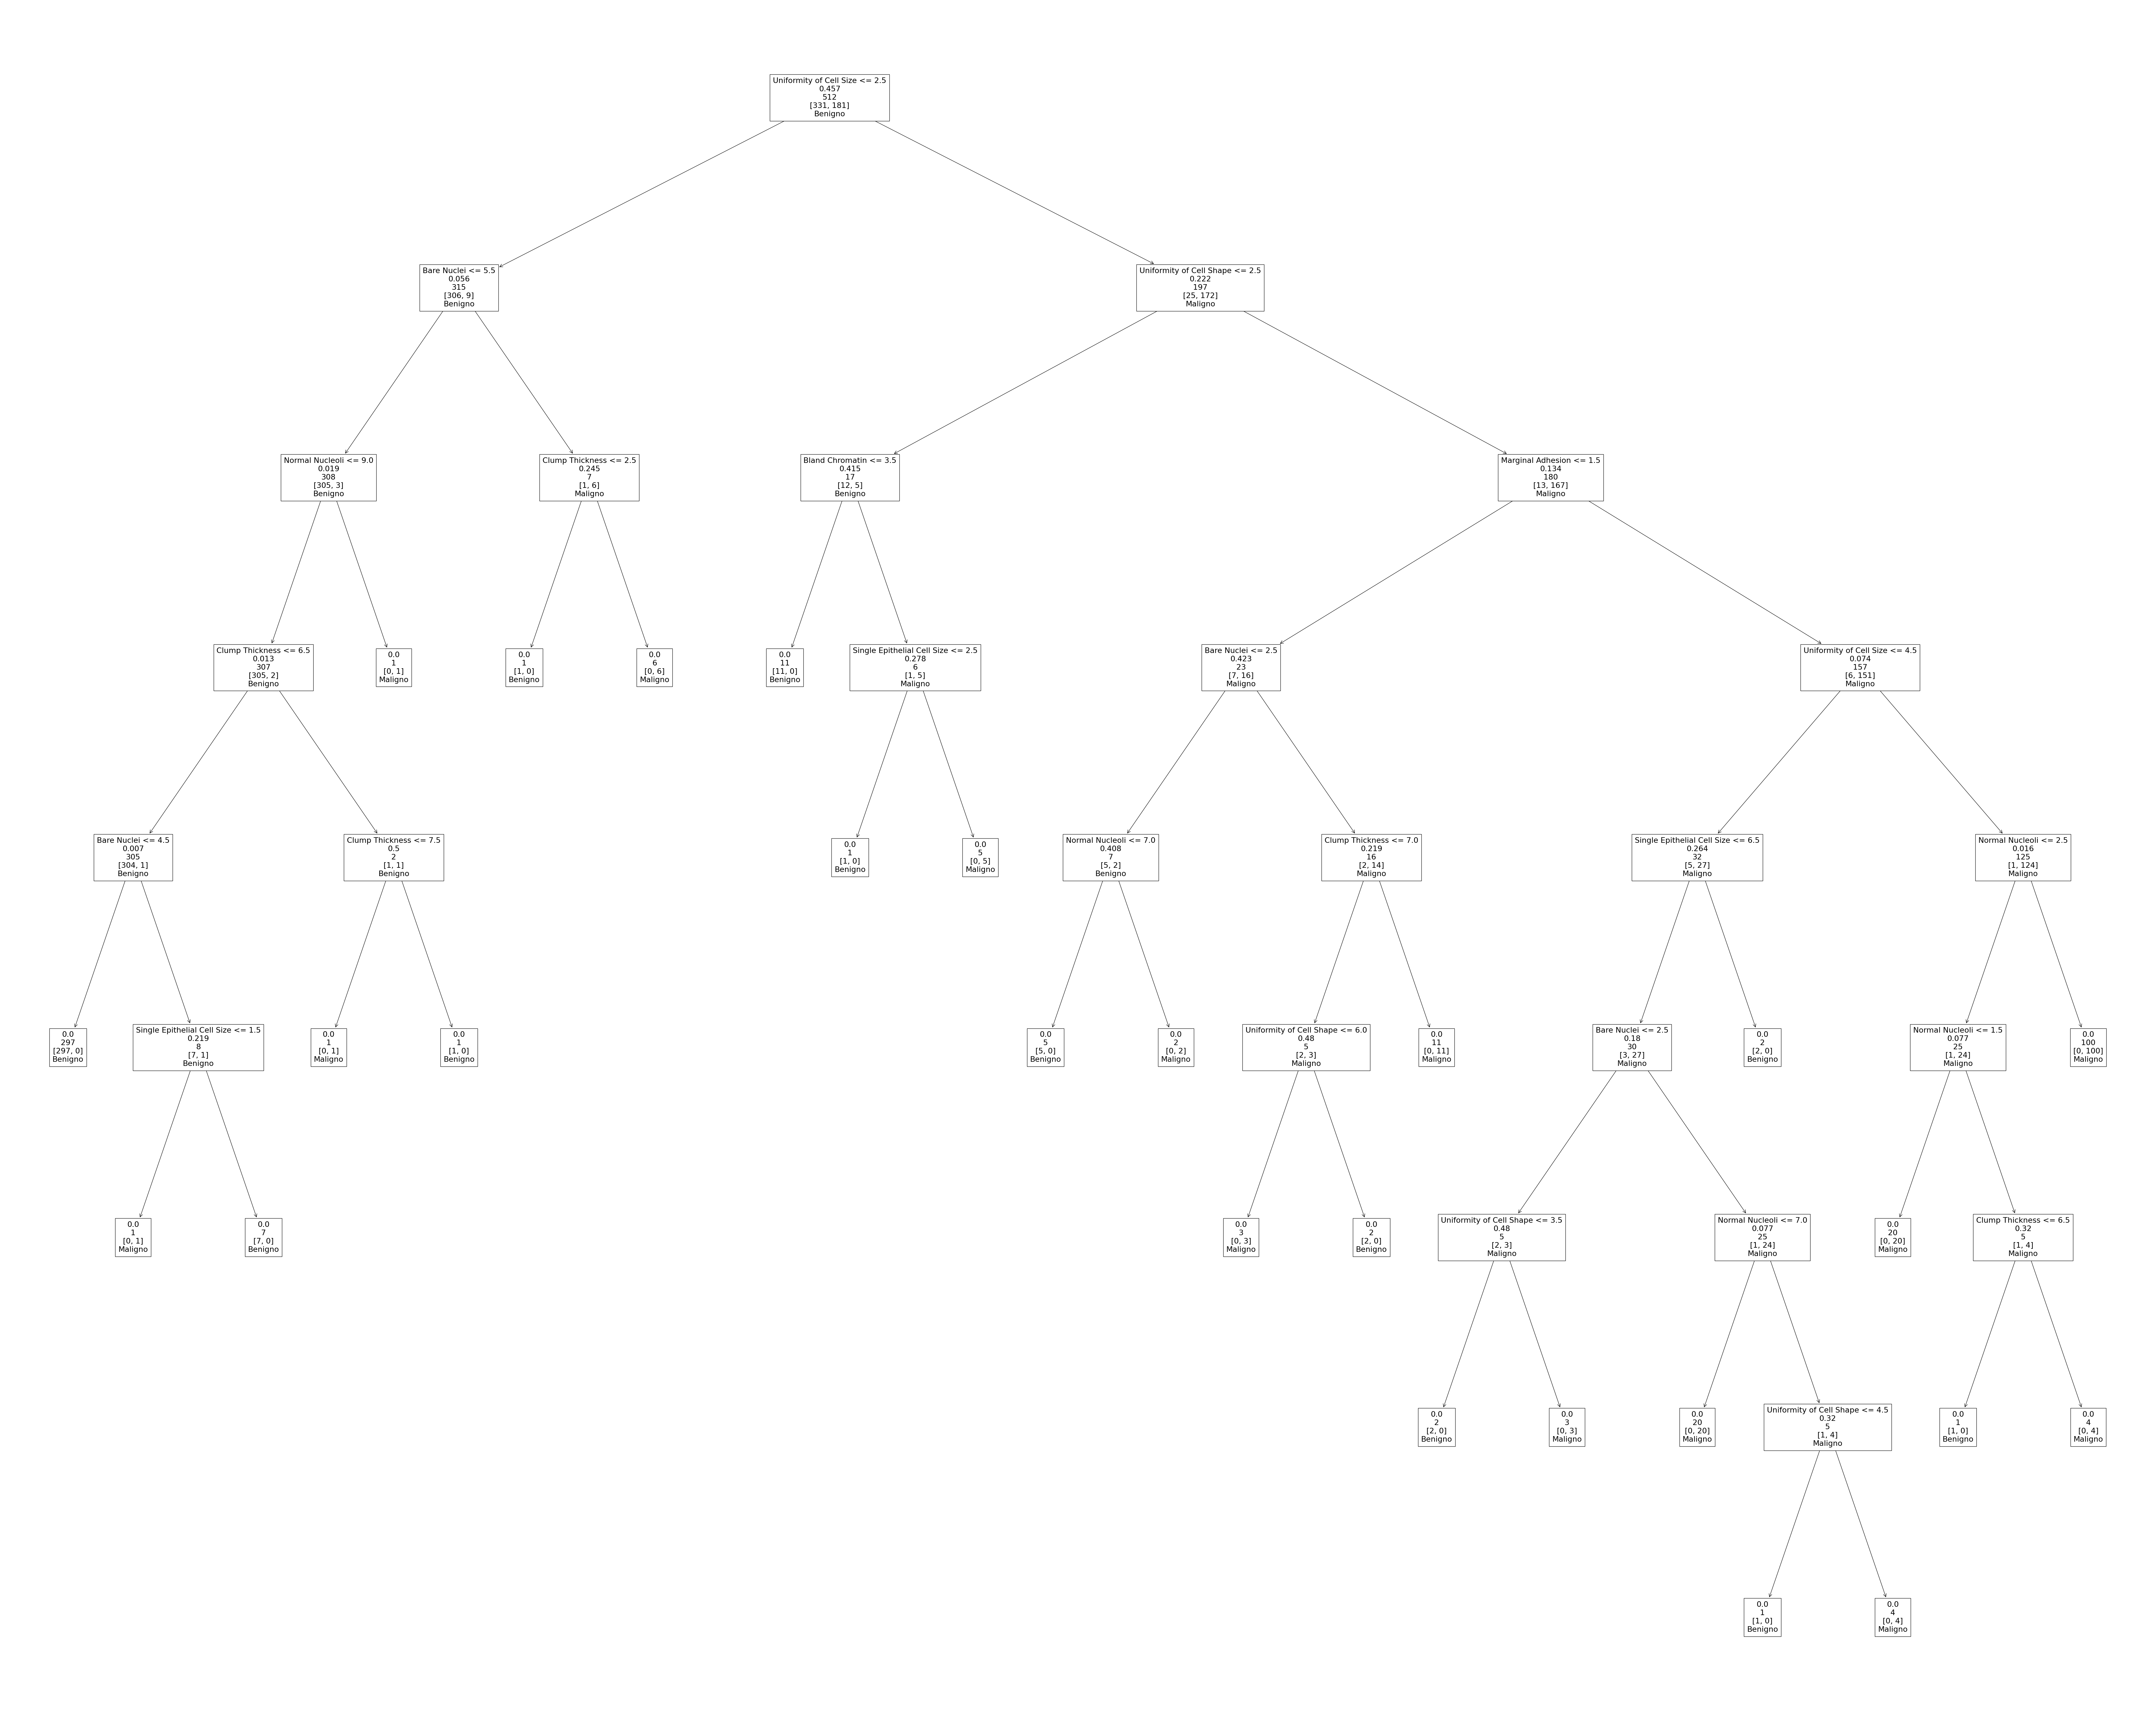

In [83]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))
plot_tree(
    modelo,
    feature_names=X_ent.columns,
    class_names=["Benigno", "Maligno"]
    ,label="none"
)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)
accuracy_score(y_ent, predicciones2)

print(f"Accuracy de train: {accuracy_score(y_ent, predicciones2)}")
print(f"Accuracy de test: {accuracy_score(y_pru, predicciones)}")

Accuracy de train: 1.0
Accuracy de test: 0.9415204678362573


In [85]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       113
           1       0.90      0.93      0.92        58

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [86]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pru, predicciones)

array([[107,   6],
       [  4,  54]])

In [87]:
cms = pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Benigno: ", "Maligno: "], index=["Benigno: ", "Maligno: "])
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Benigno: ", "Maligno: "], index=["Benigno: ", "Maligno: "])

,Benigno:,Maligno:
Benigno:,107,6
Maligno:,4,54


In [88]:
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [89]:
nueva_paciente = [10, 1, 10, 1, 8, 1, 3, 8, 10]
prediccion = modelo.predict([nueva_paciente])
if prediccion[0] == 0:
  print("Benigno")
else:
  print("Maligno")

Benigno


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


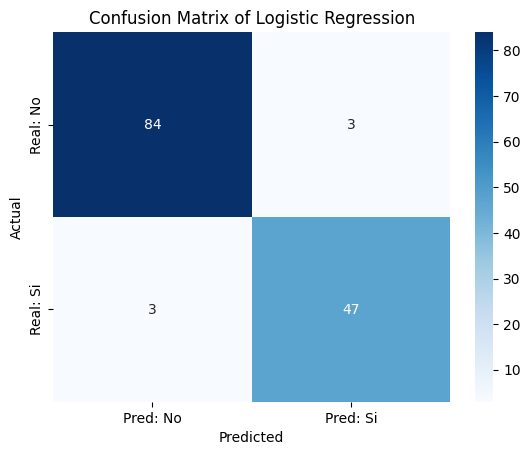

In [90]:
sb.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

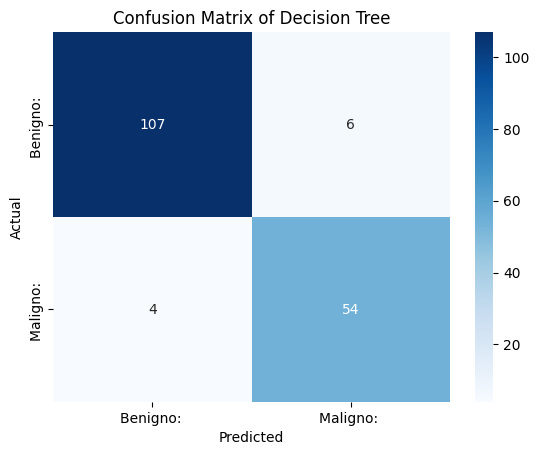

In [91]:
sb.heatmap(cms, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Decision Tree')
plt.show()